# Build a machine learning model to predict user will click the ad or not based on his experience and estimated salary for a given dataset

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
x = data.iloc[:,2:4].values
y = data.iloc[:,-1:].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [6]:
classifier = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_depth = 3)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [7]:
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [8]:
y_test[0:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]])

In [9]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[55,  3],
       [ 1, 21]])

In [10]:
score = accuracy_score(y_test, y_pred)
score

0.95

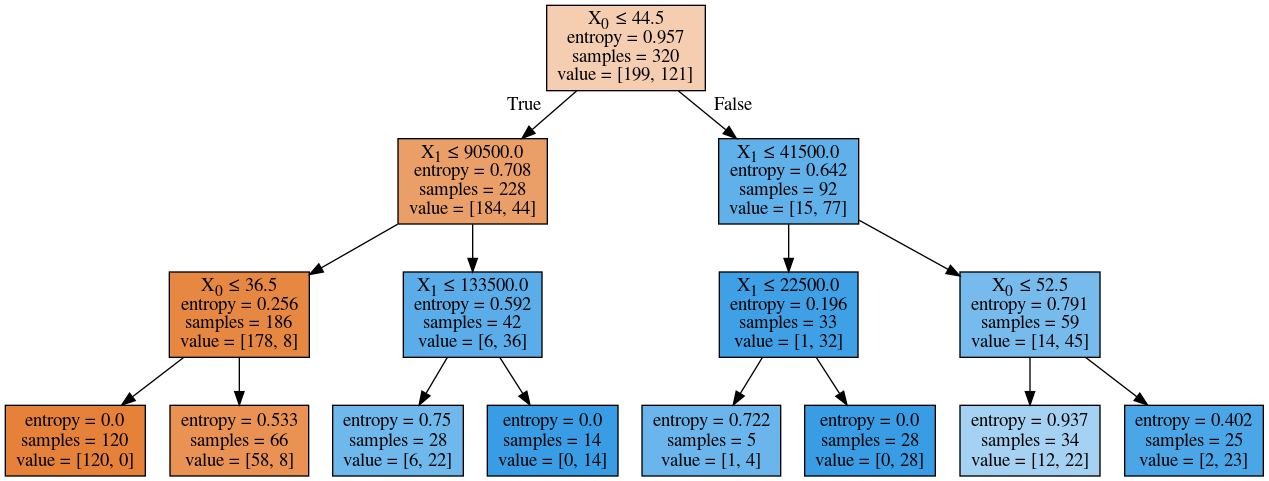

In [11]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


#Create Dot data(returns tree in string format)
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True,  
                special_characters=True)
#Draw graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

#Show graph
Image(graph.create_png())

In [12]:
pickle.dump(classifier, open('model.pkl','wb'))